# 01 - SimHandle


## 1.1 - Input Data File Study and Understanding

The file used to study is the one used during the PhD experiments, namely "*spe9imex.dat*". A description of it could be found in Report file with "*Research Diary (Journal) - LaMEP - Rafael.docx*" in "*doc/*" directory, in the section "*DS1 - SPE 9*".

After conducting a software documentation search, I started and spent a big time of this analysis using a trial/edit/simulation/error process. Hopefully I did reach the files related to one seminar given by the Professor Mahmoud Reza Pishvaie (in Sharif University of Technology). Thank you! They are in the "*doc/references*" folder.

Later I got access to the oficial documentation "*mx201510en*" in pdf and windows html helper documents. Of course, this explainned almost everything quite well.

Only parts of the "*spe9imex.dat*" are presented here to make easier to understand and to present. The original content has 2669 lines.

To better understand the system input (specially the array system) I strongly recomend the complete lecture of the section 'Keyword Data Entry System' in the manual (pages 209-245), read some examples bellow and later come back again to this section of the manual.

Usually each DataSet file is composed of seven (7) related parts (groups), including:

1. **Input/Output Control**
2. **Reservoir Description**
3. **Component Properties**
4. **Rock-Fluid Data**
5. **Initial Conditions**
6. **Numerical Methods Control**
7. **Well and Recurrent Data**

Keywords composing the Dataset usually are allowed only in its own section (group). The order of them is important too.

---

The File starts with an comment header descriptor, and after the first run, using IMEX simulator, one additional line is added in the end of this section, like this:

```
**************************************************************************************
**                                                                                  **
** MODEL:  24x25x15                SPE 9                  3-D HETEROGENEOUS EXAMPLE **
**                                                                                  **
**************************************************************************************
**                                                                                  **
** Ninth Comparative Solution Project:  Killough, J.E., "Ninth SPE Comparative      **
** Solution Project: A Reexamination of Black-Oil Simulation", Thirteenth SPE       **
** Symposium on Reservoir Simulation, 1995 (SPE 29110). This is 24 x 25 x 15        **
** heterogeneous Cartesian grid problem with a water injector located at (24,25)    **
** and 25 producers.                                                                **
**************************************************************************************                                
** 2019-11-05, 08:13:57, Usuario
```

It is followed by a line saying the software simulator for this specific content

```
RESULTS SIMULATOR IMEX
```

___

### 1.1.1 - Input/Output Control

A sequence of content related to the group I/O inputed is related in the following section:

```
********************************************************************************
** I/O Control Section                                                        **
********************************************************************************

*TITLE1
'Ninth SPE Comparative Solution Project'
*TITLE2
'STONE2, 3-D HETEROGENEOUS EXAMPLE'
*TITLE3
'Killough, 13th SPE Res Sim Symp, 1995'

*NOLIST
*INUNIT *FIELD              ** Field units are used for both input and output.

*WPRN   *WELL 0
*WPRN   *GRID 0
*OUTPRN *GRID *PRES *SO *SW  *SG
*OUTPRN *TABLES *NONE

*WSRF   *GRID   *TIME
*WSRF   *WELL   *TIME
*OUTSRF *GRID *SO *SW  *SG  *PRES

*OUTSRF *SPECIAL 1 1 1 PRES
*OUTSRF *SPECIAL 24 25 11 PRES
*OUTSRF *SPECIAL 24 25 12 PRES
*OUTSRF *SPECIAL 24 25 13 PRES
*OUTSRF *SPECIAL 24 25 14 PRES
*OUTSRF *SPECIAL 24 25 15 PRES
*OUTSRF *SPECIAL 8 13 2 PRES
*OUTSRF *SPECIAL 8 13 3 PRES
*OUTSRF *SPECIAL 8 13 4 PRES

*OUTSRF *SPECIAL 1 13 1 SG
*OUTSRF *SPECIAL 5 13 1 SG
*OUTSRF *SPECIAL 10 13 1 SG
*OUTSRF *SPECIAL 15 13 1 SG

*OUTSRF *SPECIAL 24 25 1 SW
*OUTSRF *SPECIAL 20 25 1 SW
*OUTSRF *SPECIAL 15 25 1 SW
*OUTSRF *SPECIAL 10 25 1 SW

*OUTDIARY  *WELLSTATUS
```

About the last section I got these descriptions:

``` *TITLE ```

``` 'string description' ```

as the name explicit, it is related to different titles sections and reservoir descriptions with multilevel description (Titles) to make it manageble by the users.

_REF: mx201510en.pdf pages 87, 265-268_

``` *NOLIST ```

``` *INUNIT *FIELD ```

**\*NOLIST** specifies that not include the input data file into the output print file, starting immediately after the current line.

_REF: mx201510en.pdf page 219_

**\*INUNIT** specifies the input data units, usually one of: SI (standard international system), FIELD (field units, most used in oil/gas industry), LAB (laboratory units), or MODSI (modified SI system). Defaults is SI, that why it was set to \*FIELD in this file.

_REF: mx201510en.pdf page 275_

``` *WPRN   *WELL 0 ```

``` *WPRN   *GRID 0 ```

``` *OUTPRN *GRID *PRES *SO *SW  *SG ```

``` *OUTPRN *TABLES *NONE ```

The **\*WPRN** and **\*OUTPRN** keywords are related to the what and within frequency contents muts appears in output file. They can appear in this \[1\] I/O Control Group Section and also later in  the \[7\] Well and Recurent Data Section.

The **\*WPRN** is relative to how frequently the information related to GRID, WELL and LAYERS needs to be put in output file. The default pattern is relative to print everything at each *TIME defined in the file. If no information was demanded put a 0 following the name ot the property.

In this file \*WPRN is setting well and grid to output nothing, but later in the last KW group section it appears again saying to store well and grid properties at each timestep.

Also, \*OUTPRNT keyword here is saying to store grid data properties related to pressure, oil saturation, water saturation, and gas saturation.

_REF: mx201510en.pdf page 90, 286-296_



``` *WSRF   *GRID   *TIME ```

``` *WSRF   *WELL   *TIME ```

``` *OUTSRF *GRID *SO *SW  *SG  *PRES ```

``` *OUTSRF *SPECIAL 1 1 1 PRES ```

``` *OUTSRF *SPECIAL 24 25 11 PRES ```

...

``` *OUTSRF *SPECIAL 1 13 1 SG ```

...

``` *OUTSRF *SPECIAL 24 25 1 SW ```

...


The **\*WSRF** and **\*OUTSRF** keywords follows the same behavior of the earlier commands but are related to the what and within frequency contents muts appears in SR2 file for graphical displaying. They can appear in this \[1\] I/O Control Group Section and also later in  the \[7\] Well and Recurent Data Section.

The **\*WSRF** is relative to how frequently the information related to GRID, WELL and LAYERS needs to be put in output file. The default pattern is relative to print everything at each *TIME defined in the file. If no information was demanded put a 0 following the name ot the property.

In this file \*WSRF is setting well and grid to output at each time defined in the final section.

Also, \*OUTSRF keyword here is saying to store grid data properties related to oil saturation, water saturation, gas saturation, and pressure. A lot of \*SPECIAL registers were set to specific plotting.

_REF: mx201510en.pdf page 91, 297-305_



``` *OUTDIARY  *WELLSTATUS ```

The **\*OUTDIARY** controls part of the informatino in the output diary file. Because the \*WELL STATUS appears sequentially it denotes that the saturations (oil, gas, water) and pressure of all injection/production wells will be written.

_REF: mx201510en.pdf page 306-307_

End of Section Input/Output Control

---

### 1.1.2 - Reservoir Description

A sequence of content related to the group Reservoir Description is related in the following section:

```
********************************************************************************
** Reservoir Description Section                                              **
********************************************************************************

*GRID *CART 24 25  15       ** 24 blocks in the I(x)& 25 in the J(y) directions.
                            ** 15 layers in the K (z) direction.
*KDIR *DOWN                 ** K=1 for top layer, K=15 for bottom layer

*DI *CON 300.0              ** I direction block dimensions

*DJ *CON 300.0              ** J direction block dimensions

*DK *KVAR                   ** K direction block dimensions (layer thicknesses)
20 15 26 15 16 14 8 8 18 12 19 18 20 50 100

*DEPTH 1 1 1 9010.          ** Depth to center of first block, in top layer.
*DIP -10.0 0.0               ** Reservoir dips 10 degrees in the I direction.
                            ** No dip in the J direction

*POR *KVAR                  ** Porosity is constant for each layer
                            ** but vary by layer
.087 .097 .111 .16 .13 .17 .17 .08 .14 .13 .12 .105 .12 .116 .157

*CPOR   1.0E-6              ** Rock compressibility and
*PRPOR 3600.0               ** reference pressure.

*PERMI *ALL                 ** An array of geostatistically distributed
                            ** values is used for permeability in I direction.
** LAYER  1
** ROW    1
       49.29276      162.25308      438.45926      492.32336      791.32867
      704.17102      752.34912      622.96875      542.24493      471.45953
      246.12650       82.07828       82.87408      101.65224       57.53632
       47.73741       55.07134       24.33975       41.06571       76.64680
      158.22012       84.31137       98.32045       67.18009
** ROW    2
       59.36459       32.75453       48.89822       78.56290      152.85838
       48.61450       45.90883       49.59706       87.95659       63.36467
       36.76624       22.82411       12.88787        7.30505        7.74248
       11.78211       23.77054      123.28667      618.79059      535.32922
      264.58759      387.70538      682.85431      823.64056
** ROW    3

...

** ROW    24
       39.32721       44.30146       56.55714      125.19577       85.31541
       80.05965       76.22941       64.71399       20.18338       17.06875
       33.89415       39.89968       24.17484       22.23781       33.97250
       33.50774       21.87134        8.44310        6.99710       10.30638
        7.77214       11.00815       12.07220       29.88515
** ROW    25
       67.42879      167.64226      167.21396      293.34863      348.70944
      499.50162      162.70255       91.16136       46.47388       39.21331
       11.85997       12.08859       18.62917       21.50725       36.22818
       44.15623       37.72081       72.00138       67.82285      182.54388
      117.36562      126.18334       95.86160      123.95855
** LAYER  2
** LAYER  3
 
 ...
 
** LAYER  14
** LAYER  15
** ROW    1
       16.10543       11.42444        9.40110       17.90929       13.42825
        9.31416        7.36817       38.21529       48.50117       42.75115
       30.82360       21.55525       12.68888        5.06726        2.52429
        1.10382        1.42259        1.25391        1.83292        1.81990
        1.86886        2.06910        2.12947        1.51879
** ROW    2
        1.18379        2.26189        2.61705        5.99524       10.31299
       15.17937       32.40075       33.90037      109.47345      261.72995
      238.24753      206.15742      121.33305      242.47713      166.94165
      146.50681       13.91259        7.39986        5.83849        6.06996
        7.95473        8.99119       13.17873       39.65227

...

** ROW    24
        7.89712        4.95030        5.71962        7.83024       11.71794
       23.62131       33.05274       70.84187        7.38943        7.49921
       11.69680       10.97819       14.39844       22.66654       28.41940
       24.50287       13.19070       14.89152       24.02716       24.94995
       19.09564        8.27764       22.19613       17.68164
** ROW    25
       22.53480       17.92533        8.57474       10.12566       17.64281
        8.75865        6.21574        3.95186        8.25921       28.63912
       23.45510       23.26124       26.54238       18.81447       13.00590
       16.30125       11.36926        9.55338        3.51044       11.66872
        7.39936       19.01242       38.47255       47.05342

*PERMJ *EQUALSI             ** J-direction permeability same as I-direction
*PERMK *EQUALSI * 0.01      ** K-direction permeability = 0.01 I-direction k

*MODEL *BLACKOIL            ** Solve three phase three equations.
```

Description of the section, as follow:

```
*GRID *CART 24 25  15       ** 24 blocks in the I(x)& 25 in the J(y) directions.
                            ** 15 layers in the K (z) direction.
```

**\*GRID** specifies the main structure of the reservoir. As appears on the comments, the first value refers to I, second to J and the las to K directions. There is possible to use \*CART, \*VARI, \*CORNER, and \*RADIAL.

_REF: mx201510en.pdf pages 313-319_

```
*KDIR *DOWN                 ** K=1 for top layer, K=15 for bottom layer
```

**\*KDIR** specifies how to set the sequence of layers (K) in the reservoir, if it increasing in ascending to the surface or goes down follow the gravity. To options is allowed \*UP, and \*DOWN.

_REF: mx201510en.pdf pages 320-321_

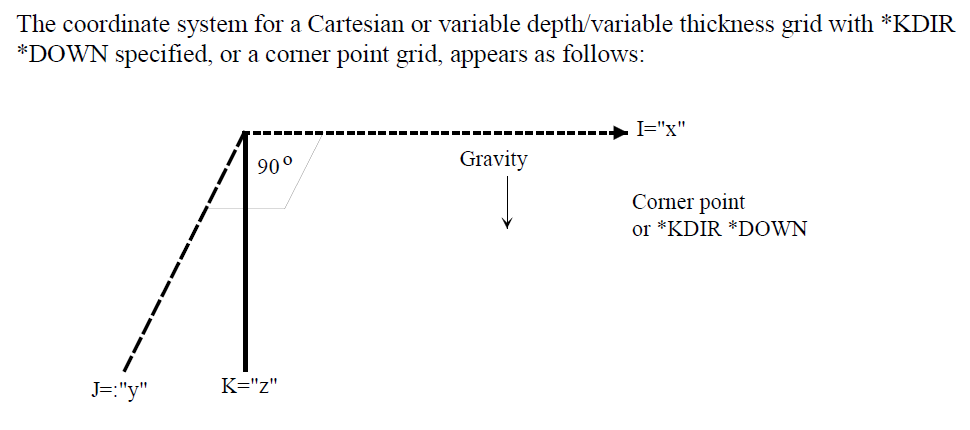

_REF: mx201510en.pdf page 316_

```
*DI *CON 300.0              ** I direction block dimensions

*DJ *CON 300.0              ** J direction block dimensions

*DK *KVAR                   ** K direction block dimensions (layer thicknesses)
20 15 26 15 16 14 8 8 18 12 19 18 20 50 100
```

**\*DI**, **\*DJ**, and **\*DK** specify, each of them, the lenght of each grid block on the respective direction (I,J,K 'x,y,z'). Usually it could be specified using the keywords \*CON, when the lenghts are constant over the direction, or (\*IVAR, \*JVAR, \*KVAR) when the lenght of block dimension varies over the serie. In the last case each size must be explicit defined.

_REF: mx201510en.pdf pages 322-327_

```
*DEPTH 1 1 1 9010.          ** Depth to center of first block, in top layer.
```

**\*DEPTH**, define the reservoir depth (in relation to the surface) considering the center of the specified grid block (in this case the cell i=1, j=1, k=1). It could be set also in relation to the top of the cell applying the specific keyword (\*CENTER, \*TOP).

_REF: mx201510en.pdf pages 328-329_

```
*DIP -10.0 0.0               ** Reservoir dips 10 degrees in the I direction.
                             ** No dip in the J direction
```

**\*DIP**, requires two values (for I and J directions respectivly), it indicates the dip tilt angle on relative directions where the reservoir must be inclinated (if set). In this case there is a -10 degrees in I direction (the horizontal plane in I goes down - negative -.

_REF: mx201510en.pdf pages 336-337_

```
*POR *KVAR                  ** Porosity is constant for each layer
                            ** but vary by layer
.087 .097 .111 .16 .13 .17 .17 .08 .14 .13 .12 .105 .12 .116 .157
```

**\*POR**, indicates the porosity assigned for each block in the grid. In this case using the keyword \*KVAR, it defines the porosity with constant value for each layer (K), one value per layer.

_REF: mx201510en.pdf page 388_

```
*CPOR   1.0E-6              ** Rock compressibility and
*PRPOR 3600.0               ** reference pressure.
```

**\*CPOR**, indicates rock compressibility of the reservoir blocks and the related **\*PRPOR** reference pressure for the rock compressibility.

_REF: mx201510en.pdf pages 389-390_

```
*PERMI *ALL                 ** An array of geostatistically distributed
                            ** values is used for permeability in I direction.
** LAYER  1
** ROW    1
       49.29276      162.25308      438.45926      492.32336      791.32867
      704.17102      752.34912      622.96875      542.24493      471.45953
      246.12650       82.07828       82.87408      101.65224       57.53632
       47.73741       55.07134       24.33975       41.06571       76.64680
      158.22012       84.31137       98.32045       67.18009
** ROW    2
...
** LAYER 15
** ROW 25
       22.53480       17.92533        8.57474       10.12566       17.64281
        8.75865        6.21574        3.95186        8.25921       28.63912
       23.45510       23.26124       26.54238       18.81447       13.00590
       16.30125       11.36926        9.55338        3.51044       11.66872
        7.39936       19.01242       38.47255       47.05342
```

**\*PERMI** (\*PERMJ, \*PERMK), indicates an array of I direction permeabilities (I DIRECTION PERMEABILITIES!, PERMJ for J, PERMK for K). The keyword \*ALL indicates that the property will be input cell by cell for each block in the reservoir starting from the cell (i=1, j=1, k=1) to (i=24, j=25, k=25 in this case). Increasing first for i, later j, ans last k. The commented lines (\*\* LAYER 1, \*\* ROW 1, is just to make it easier to the reader).

_REF: mx201510en.pdf pages 237, 400-401_

```
*PERMJ *EQUALSI             ** J-direction permeability same as I-direction
*PERMK *EQUALSI * 0.01      ** K-direction permeability = 0.01 I-direction k
```

**\*PERMJ**, **\*PERMK**, set the array of J direction permeabilities to be equals to the I direction permeabilities, and set the array of K direcion permeabilities to be a fraction of 0.01 (1%) of those defined in I direction.

_REF: mx201510en.pdf pages 230, 400-401_

```
*MODEL *BLACKOIL            ** Solve three phase three equations.
```

Described in the next section (Apparently it was put here as a mistake, it pertains to the Component Properties Section). The same happens with to other sections, and so one I'll not emphatizes it.

End of section Reservoir Description

---

### 1.1.3 - Component Properties

Section related to the component property content. The SPE9 files includes:

```
*MODEL *BLACKOIL            ** Solve three phase three equations.

********************************************************************************
** Component Property Section                                                 **
********************************************************************************
*TRES 100
*PVT  *ZG
** p       rs     bo      zg    viso     visg
  14.7       0 1.0000   .9999   1.20    .0125
   400     165 1.0120   .8369   1.17    .0130
   800     335 1.0255   .8370   1.14    .0135
  1200     500 1.0380   .8341   1.11    .0140
  1600     665 1.0510   .8341   1.08    .0145
  2000     828 1.0630   .8370   1.06    .0150
  2400     985 1.0750   .8341   1.03    .0155
  2800    1130 1.0870   .8341   1.00    .0160
  3200    1270 1.0985   .8398    .98    .0165
  3600    1390 1.1100   .8299    .95    .0170
  4000    1500 1.1200   .8300    .94    .0175
  9000    1510 1.1210   .8301    .93    .0176
*DENSITY *OIL    44.986
*GRAVITY *GAS     0.92
*DENSITY *WATER  63.021
*CO    1.0E-6
*BWI   1.0034
*CW    1.0E-6
*REFPW 3600
*VWI   0.96
*CVW   0.0
```

Description of the section, as follow:

```
*MODEL *BLACKOIL            ** Solve three phase three equations.
```

**\*MODEL**, determine the fluid component model. There are 13 in this CMG version (2015), within: \*OILWATER, \*GASWATER, \*VOLATLE_OIL, \*BLACKOIL, etc. The choosen model here is the \*BLACKOIL, that consist in modeling the three phase (oil, water, and gas).

_REF: mx201510en.pdf pages 489-492_

```
*TRES 100
```

**\*TRES**, set the temperature at the reservoir.

_REF: mx201510en.pdf page 493_

```
*PVT  *ZG
** p       rs     bo      zg    viso     visg
  14.7       0 1.0000   .9999   1.20    .0125
   400     165 1.0120   .8369   1.17    .0130
   800     335 1.0255   .8370   1.14    .0135
  1200     500 1.0380   .8341   1.11    .0140
  1600     665 1.0510   .8341   1.08    .0145
  2000     828 1.0630   .8370   1.06    .0150
  2400     985 1.0750   .8341   1.03    .0155
  2800    1130 1.0870   .8341   1.00    .0160
  3200    1270 1.0985   .8398    .98    .0165
  3600    1390 1.1100   .8299    .95    .0170
  4000    1500 1.1200   .8300    .94    .0175
  9000    1510 1.1210   .8301    .93    .0176
```

**\*PVT**, defines the start values for PVT talbe for oil and gas tables. \*EG (for gas expasion factor), \*BG (for gas formatino volume factor), and \* ZG (gas compressibility factor) will be used in PVT information. Usuallys the following informatino must be given respecting the order:

- p, pressure
- rs, solution gas-oil ratio
- bo, formation volume factor
- one of:
    - eg, gas expasion factor
    - bg, gas formation volume factor
    - zg, gas compressibility factor
- viso, viscosity of saturated oil
- visg, viscosity at pressure p

The table must be given in order of increasing pressure and should extend to above the initial bubble point pressure. Usually the table has at least two sequence of entries. In this case it were set twelve (12) sequence of values, using the \*ZG (gas compressibility factor).

_REF: mx201510en.pdf pages 494-495_

```
*DENSITY *OIL    44.986
*GRAVITY *GAS     0.92
*DENSITY *WATER  63.021
```

**\*DENSITY**, define the density value for a PVT region. It demands a sub-keyword parameter to set each (\*OIL, \*GAS, \*WATER, or \*SOLVENT). In this case the \*OIL and \*WATER were set.

**\*GRAVITY**, in similar it defines the gravity value for a PVT table, but only for gas.

_REF: mx201510en.pdf pages 559-560_

```
*CO    1.0E-6
```

**\*CO**, set the oil compressibility value for a PVT region (If not present in the table as optional content)

_REF: mx201510en.pdf page 561_

```
*BWI   1.0034
*CW    1.0E-6
*REFPW 3600
```

**\*BWI**, set the water formation volume factor, **\*CW** set water compressibility, and **\*REFPW** set the reference pressure. All of them as value only (not array).

_REF: mx201510en.pdf pages 563-564_

```
*VWI   0.96
*CVW   0.0
```

**\*VWI**, sets the water viscosity value, and **\*CVW** sets the pressure dependence of water viscosity.

_REF: mx201510en.pdf pages 565-566_

End of section Component Properties

---

### 1.1.4 Rock-Fluid Data

Section related to the rock-fluid data content. The SPE9 files includes:

```
*ROCKFLUID
********************************************************************************
** Rock-Fluid Property Section                                                **
********************************************************************************
*RPT 1


*SWT                          ** Water-oil relative permeability table
** sw          krw     krow       pcow
0.151090       0.0     1.0        400.0
0.151230       0.0     0.99997    359.190
0.151740       0.0     0.99993    257.920
0.152460       0.0     0.99991    186.310
0.156470       0.0     0.999510    79.060
0.165850       0.0     0.996290    40.010
0.178350       0.0     0.991590    27.930
0.203350   0.000010    0.978830    20.400
0.253350   0.000030    0.943730    15.550
0.350000   0.000280    0.830230    11.655
0.352000   0.002292    0.804277     8.720
0.354000   0.004304    0.778326     5.947
0.356000   0.006316    0.752374     3.317
0.358000   0.008328    0.726422     1.165
0.360000   0.010340    0.700470     0.463
0.364395   0.015548    0.642258    -0.499
0.368790   0.020756    0.584046    -1.139
0.370000   0.022190    0.568020    -1.194
0.380000   0.035890    0.434980    -1.547
0.400000   0.069530    0.171430    -1.604
0.433450   0.087900    0.125310    -1.710
0.461390   0.104910    0.094980    -1.780
0.489320   0.123290    0.070530    -1.860
0.517250   0.143030    0.051130    -1.930
0.573120   0.186590    0.024640    -2.070
0.601060   0.210380    0.016190    -2.130
0.656930   0.261900    0.005940    -2.260
0.712800   0.318650    0.001590    -2.380
0.811110   0.430920    0.000020    -2.600
0.881490   0.490000    0.000000    -2.75

*SGT                           ** Liquid-gas relative permeability table
** sl        krg    krog   pcog
0.000000   0.0000   1.00   0.0
0.040000   0.0000   0.60   0.2
0.100000   0.0220   0.33   0.5
0.200000   0.1000   0.10   1.0
0.300000   0.2400   0.02   1.5
0.400000   0.3400   0.00   2.0
0.500000   0.4200   0.00   2.5
0.600000   0.5000   0.00   3.0
0.700000   0.8125   0.00   3.5
0.848910   1.0000   0.00   3.9

```

Description of the section, as follow:

```
*ROCKFLUID
```

**\*ROCKFLUID**, Just indicate the start of the section, it is a required keyword. Must be the first keyword in this group (Rock-Fluid Data).

_REF: mx201510en.pdf page 590_

```
*RPT 1
```

**\*RPT**, define the relative permeability curves will be defined by table entries. The value used with \*RTYPE to assign relative permeability curves to grid blocks.

_REF: mx201510en.pdf pages 591_

```
*SWT                          ** Water-oil relative permeability table
** sw          krw     krow       pcow
0.151090       0.0     1.0        400.0
0.151230       0.0     0.99997    359.190
0.151740       0.0     0.99993    257.920
0.152460       0.0     0.99991    186.310
0.156470       0.0     0.999510    79.060
0.165850       0.0     0.996290    40.010
0.178350       0.0     0.991590    27.930
0.203350   0.000010    0.978830    20.400
0.253350   0.000030    0.943730    15.550
0.350000   0.000280    0.830230    11.655
0.352000   0.002292    0.804277     8.720
0.354000   0.004304    0.778326     5.947
0.356000   0.006316    0.752374     3.317
0.358000   0.008328    0.726422     1.165
0.360000   0.010340    0.700470     0.463
0.364395   0.015548    0.642258    -0.499
0.368790   0.020756    0.584046    -1.139
0.370000   0.022190    0.568020    -1.194
0.380000   0.035890    0.434980    -1.547
0.400000   0.069530    0.171430    -1.604
0.433450   0.087900    0.125310    -1.710
0.461390   0.104910    0.094980    -1.780
0.489320   0.123290    0.070530    -1.860
0.517250   0.143030    0.051130    -1.930
0.573120   0.186590    0.024640    -2.070
0.601060   0.210380    0.016190    -2.130
0.656930   0.261900    0.005940    -2.260
0.712800   0.318650    0.001590    -2.380
0.811110   0.430920    0.000020    -2.600
0.881490   0.490000    0.000000    -2.75
```

**\*SWT**, defines the start values for the water-oil relative permeability table. Usuallys the following information must be given respecting the order:

- Sw, water saturation (fraction)
- krw, relative permeability to water (fraction)
- krow, relative permeability to oil (fraction)
- pcow, water-oil capillary pressure
- pcowi, water-oil capillary presure (optional)
- scorm, irreducible oil saturation (fraction)

In this case of SPE9 only sw, krw, krow, and pcow were given.

_REF: mx201510en.pdf pages 594-604_

```
*SGT                           ** Liquid-gas relative permeability table
** sl        krg    krog   pcog
0.000000   0.0000   1.00   0.0
0.040000   0.0000   0.60   0.2
0.100000   0.0220   0.33   0.5
0.200000   0.1000   0.10   1.0
0.300000   0.2400   0.02   1.5
0.400000   0.3400   0.00   2.0
0.500000   0.4200   0.00   2.5
0.600000   0.5000   0.00   3.0
0.700000   0.8125   0.00   3.5
0.848910   1.0000   0.00   3.9
```

**\*SWT**, defines the start of values for liquid-gas relative permeability table depdentend on gas saturation, and \*SLT the same but for table dependent on liquid saturation. Usuallys the following information must be given respecting the order:

- sl, total liquis saturation (fraction)
- sg, gas saturation (fraction)
- krg, relative permeability to gas (fraction)
- krog, relative permeability to oil (fraction)
- pcog, gas-oil capillary pressure
- pcogi, imbibition gas-oil capillary pressure (optional)

In this case of SPE9 only sg (see note bellow), krw, krow, and pcow were given.

**IMPORTANTE NOTE:** apparently the comment just after the kweyword SGT is wrong, because it choses to use SGT (gas) and comment sl (liquide) instead of sg. I suppose that 

_REF: mx201510en.pdf pages 607-617_

End of section Component Properties

---

### 1.1.5 Initial Condition

Section related to the initial condiciont settings content. The SPE9 files includes:

```
*INITIAL
********************************************************************************
** Initial Conditions Section                                                 **
********************************************************************************
*VERTICAL *BLOCK_CENTER     ** Use vertical equilibrium calculation.
*PB *CON    3600.0          ** buble point pressure
*REFDEPTH   9035.           ** Give a reference depth  and
*REFPRES    3600.           ** associated pressure.
*DWOC       9950.           ** Depth to water-oil contact
*DGOC       8800.           ** Depth to gas-oil conttact
*DATUMDEPTH 9035.
```

Description of the section, as follow:

```
*INITIAL
```

**\*INITIAL**, Just indicate the start of the section Initial Conditions, it is a required keyword. Must be the first keyword in this group (Initial Conditions).

_REF: mx201510en.pdf page 678_

```
*VERTICAL *BLOCK_CENTER     ** Use vertical equilibrium calculation.
```

**\*USER_INPUT**, **\*VERTICAL**, to define the reservoir initialization calculation. There are seven ways to do that. In this case SPE9 utilize \*BLOCK_CENTER. The \*VERTICAL indicates that pressures are determined from the hydrostatic equations , ant the sub option \*BLOCK_CENTER of \*VERTICAL assign block saturations as the saturation prevailing at the block center. Because only \*VERTICAL and \*BLACK_OIL is define, by default the \*WATER_OIL_GAS is assumed.

_REF: mx201510en.pdf pages 679-683_

```
*PB *CON    3600.0          ** buble point pressure
```

**\*PB**, an array to define the bubble point pressure for initial conditions. In this case a constant value was given to create the array (\*CON).

_REF: mx201510en.pdf page 689_

```
*REFDEPTH   9035.           ** Give a reference depth  and
*REFPRES    3600.           ** associated pressure.
```

**\*REFDEPTH**, is about to set the initial value for reference depth, and **\*REFPRES**, the initial pressure.

_REF: mx201510en.pdf pages 707-708_

```
*DWOC       9950.           ** Depth to water-oil contact
*DGOC       8800.           ** Depth to gas-oil conttact
```

**\*DWOC**, set the depth of water-oil contat, **\*DGOC** for gas-oil contatc, and **\*DWGC** for water-gas contact depth. The two firs are required in the \*VERTICAL \*BLOCK_CENTER \*WATER_OIL_GAS case (SPE9).

_REF: mx201510en.pdf pages 709-711_

```
*DATUMDEPTH 9035.
```

**\*DATUMDEPTH**, specifies the datum depth for pressure printout correction to datum, it is to adjust the pressure information contet.

_REF: mx201510en.pdf pages 712-714_

End of section Component Properties

---

### 1.1.6 Numerical Methods Control

Section related to the numerical methods control content. The SPE9 files includes:

```
*NUMERICAL
********************************************************************************
** Numerical Control Section                                                  **
********************************************************************************
*DTMAX       60.
*MAXSTEPS    300
*NORM *PRESS 500.
*NORM *SATUR 0.04  ** For this case, a relatively low CPU time is obtained with
                   ** a relatively low *NORM *SATUR.
                   ** Larger *NORM *SATUR reduce the total number of timesteps
                   ** but increase the number of Newton iterations.
                   ** The total number of Newton iterations gives a much better
                   ** indication of total CPU time than the number of timesteps.
                   ** Lower CPU times were obtained using adaptive implicit than
                   ** fully implicit.
                   ** For a fully implicit version of this case, a *NORM *SATUR
                   ** of 0.05 has a lower CPU time than with 0.04.
                   ** Fully implicit cases may be run using *AIM *OFF in this
                   ** section and in the *RUN section commenting out *AIMWELL
                   ** *WELLN and inserting *AIMSET *CON 1.
*MAXCHANGE *SATUR 0.10 ** removes a cut a timstep 42 and reduces total Newton
                       ** iterations by 3. Default value is 2*(NORM *SATUR)=.8
*PRECC 0.005
```

Description of the section, as follow:

```
*NUMERICAL
```

**\*NUMERICAL**, states the start of the Numerical Methods Control, and it is optional Use only if it is necessary to change any of the default settings.

_REF: mx201510en.pdf page 729_

```
*DTMAX       60.
```

**\*DTMAX**, set the maximum time-step size. Default it is 365 days.

_REF: mx201510en.pdf page 732_

```
*MAXSTEPS    300
```

**\*MAXSTEPS**, defines the maxium number of timesteps for the simulatino run.

_REF: mx201510en.pdf page 730_

```
*NORM *PRESS 500.
*NORM *SATUR 0.04
*MAXCHANGE *SATUR 0.10 ** removes a cut a timstep 42 and reduces total Newton
                       ** iterations by 3. Default value is 2*(NORM *SATUR)=.8
```

**\*NORM**, identifies the typica changes in the basic variables over a timestep, in this case (SPE9) it defines as 500 for pressure (\*PRESS) and 0.04 for saturations (\*SATUR).

**\*MAXCHANGE**, identifies whenever a timestep is possible cut if the maximum change in pressure or saturation is greater then the specified.

_REF: mx201510en.pdf pages 734-735_

```
*PRECC 0.005
```

**\*PRECC**, speficy the converfence tolerance for the linear equatino solver. The paramter is a tolerance value.

_REF: mx201510en.pdf page 750_

End of section Component Properties

---

### 1.1.7 Well and Recurrent Data

Section related to the numerical methods control content. The SPE9 files includes:

```
*RUN
********************************************************************************
** Well and Recurrent Data Section                                            **
********************************************************************************
*DATE 1980 01 01
*DTWELL 1.00
*AIMWELL *WELLNN

*GROUP 'ALL-WELLS' *ATTACHTO 'FIELD'
*WELL 1   'Injector'   *VERT 24 25  *ATTACHTO 'ALL-WELLS'
*WELL 2   'Producer1'  *VERT 5 1    *ATTACHTO 'ALL-WELLS'
*WELL 3   'Producer2'  *VERT 8 2    *ATTACHTO 'ALL-WELLS'
*WELL 4   'Producer3'  *VERT 11 3   *ATTACHTO 'ALL-WELLS'
*WELL 5   'Producer4'  *VERT 10 4   *ATTACHTO 'ALL-WELLS'
*WELL 6   'Producer5'  *VERT 12 5   *ATTACHTO 'ALL-WELLS'
*WELL 7   'Producer6'  *VERT 4 6    *ATTACHTO 'ALL-WELLS'
*WELL 8   'Producer7'  *VERT 8 7    *ATTACHTO 'ALL-WELLS'
*WELL 9   'Producer8'  *VERT 14 8   *ATTACHTO 'ALL-WELLS'
*WELL 10  'Producer9'  *VERT 11 9   *ATTACHTO 'ALL-WELLS'
*WELL 11  'Producer10' *VERT 12 10  *ATTACHTO 'ALL-WELLS'
*WELL 12  'Producer11' *VERT 10 11  *ATTACHTO 'ALL-WELLS'
*WELL 13  'Producer12' *VERT 5 12   *ATTACHTO 'ALL-WELLS'
*WELL 14  'Producer13' *VERT 8 13   *ATTACHTO 'ALL-WELLS'
*WELL 15  'Producer14' *VERT 11 14  *ATTACHTO 'ALL-WELLS'
*WELL 16  'Producer15' *VERT 13 15  *ATTACHTO 'ALL-WELLS'
*WELL 17  'Producer16' *VERT 15 16  *ATTACHTO 'ALL-WELLS'
*WELL 18  'Producer17' *VERT 11 17  *ATTACHTO 'ALL-WELLS'
*WELL 19  'Producer18' *VERT 12 18  *ATTACHTO 'ALL-WELLS'
*WELL 20  'Producer19' *VERT 5 19   *ATTACHTO 'ALL-WELLS'
*WELL 21  'Producer20' *VERT 8 20   *ATTACHTO 'ALL-WELLS'
*WELL 22  'Producer21' *VERT 11 21  *ATTACHTO 'ALL-WELLS'
*WELL 23  'Producer22' *VERT 15 22  *ATTACHTO 'ALL-WELLS'
*WELL 24  'Producer23' *VERT 12 23  *ATTACHTO 'ALL-WELLS'
*WELL 25  'Producer24' *VERT 10 24  *ATTACHTO 'ALL-WELLS'
*WELL 26  'Producer25' *VERT 17 25  *ATTACHTO 'ALL-WELLS'

** The minimum flowing bottomhole pressure was set to 1000 psia for
** all producers with a reference depth of 9110 feet for this pressue
** in all wells. Therefore, they are adjusted accordingly in IMEX.

** The geofac=0.355 is used for all wells to match the effective
** well radius (0.2*DX = 60 feet) specified in the paper SPE 29110

*INJECTOR  1
*INCOMP *WATER
*OPERATE  *MAX  *STW  5000.0
*OPERATE  *MAX  *BHP 4543.39

** Well geometry for the water injector.
**            rad    geofac  wfrac   skin
*GEOMETRY *K  0.5     0.355    1.0    0.0

*PERFV *GEO 1
**  kf      ff
   11:15     1

*PRODUCER  2
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1064.77

*PRODUCER  3
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1125.76

*PRODUCER  4
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1186.75

*PRODUCER  5
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1166.42

*PRODUCER  6
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1207.08

*PRODUCER  7
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1044.44

*PRODUCER  8
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1125.76

*PRODUCER  9
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1247.7

*PRODUCER  10
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1186.75

*PRODUCER  11
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1207.08

*PRODUCER  12
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1166.42

*PRODUCER  13
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1064.77

*PRODUCER  14
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1125.76

*PRODUCER  15
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1186.75

*PRODUCER  16
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1227.37

*PRODUCER  17
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1268.03

*PRODUCER  18
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1166.42

*PRODUCER  19
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1207.08

*PRODUCER  20
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1064.77

*PRODUCER  21
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1125.76

*PRODUCER  22
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1186.75

*PRODUCER  23
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1268.03

*PRODUCER  24
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1207.08

*PRODUCER  25
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP  1166.42

*PRODUCER  26
*OPERATE *MAX  *STO 1500.0
*OPERATE *MIN  *BHP   1308.69

** Well geometry for the producers.
**            rad    geofac  wfrac   skin
*GEOMETRY *K  0.5     0.355    1.0    0.0


*PERFV *GEO 2:26
** kf     ff
   2:4     1

*TIME   1
*DTWELL 1.0
*TIME  50
*TIME 100
*TIME 200

*TIME 300
*ALTER 2:26
25*100

*TIME 360
*ALTER 2:26
25*1500

*TIME 420
*TIME 480
*TIME 540
*TIME 600
*TIME 660
*TIME 720
*WPRN *WELL *TIME
*WSRF *GRID *TIME
*TIME 900
*STOP
```

Description of the section, as follow:

```

```

**\*a**, . \*BLACKOIL, that consist in modeling the three phase (oil, water, and gas).

_REF: mx201510en.pdf pages 4-4_

```

```

**\*a**, . \*BLACKOIL, that consist in modeling the three phase (oil, water, and gas).

_REF: mx201510en.pdf pages 4-4_